Name: Akhil Sreedhara<br>
NJIT UCID: as3638<br>
Email: as3638@njit.edu<br>
Date: Oct 13, 2024<br>
Professor: Dr. Yasser Abduallah<br>

<br>
GITHUB REPOSITORY: https://github.com/svakhil00/DataMiningMidterm<br>
*I had an existing github account so I just used that
<br>

  Table of Contents:<br>
  1. Basic Concepts
  2. Dataset Overview
  3. Project Folder Structure
  4. Installation Requirements
  5. Code WalkThrough
  6. Results
  7. ScreenShots
<br>

1. Basic Concepts<br>
  In this section, there are explanations for the basic concepts required to understand the rest of the project/code. It is encouraged to reference while reading the rest of this report for a deeper explanation.

  .csv(Comma Separated Values) - A .csv file is a plain text file which is formatted for storing tablular data. As the name suggests, the values are seperated by commas. In this project, we are using .csv files to store transaction data.

  Association Rule Mining - Technique used to uncover hidden relationships between variables in large datasets

  Apriori - An association rule mining algorithm.
  
  FPGrowth - Another association rule mining algorithm

  ItemSet - Items that appear together in a transaction. Used in the Apriori Algorithm.

  Frequent ItemSet - Items that appear together frequently. Used in the Apriori Algorithm.

  Support - Percentage of transactions that contain the itemset. Used to find frequent itemsets

  Confidence - Used to find the strength of Associations.
2. Dataset Overview <br>
  For my datasets, I used the five datasets given in the instructions. I used ChatGPT to format the data in a way that I could paste it in excel. I then downloaded all the datasets from excel as csvs in my project. The five datasets are amazon, bestbuy, kmart, nike, and a generic itemset.
3. Project Folder Structure<br>
  There is only one folder which has all the files for this project. Our main file is apriori.py. It is the program that uses the 3  algorithms. This is the file that should be run. Any files ending in .csv are used to store transactions. They are used by apriori.py and should not be changed or renamed. The requirements.txt file has the commands for all the external libraries that need to be installed.

4. Installation Requirements<br>
  The project was completed on Python version 3.12 so it is recommended to use that when running the program. There are 2 libraries that need to be installed for this program to run. The first is efficient-apriori which is what I use for an apriori library. The second is fpgrowth_py which I use to run the fpgrowth algorithm.

  To install the installer enter the following command into the terminal:<br>
  Mac/Linux: ```python -m ensurepip --upgrade```<br>
  Windows: ```py -m ensurepip --upgrade```<br>
  To install the packages, go to the terminal and enter the following 2 commands:<br>
  ```pip install efficient-apriori```<br>
  ```pip install fpgrowth_py```
5.Code Walkthrough<br>
  In this section, I will walk through the code explaining what each piece does.
  This first section is used to import all libraries used in the program. csv is used to read the csv files that contain transactions. time is used to track algorithm performance. itertools is used to iterate through data easily while finding association rules.

In [ ]:
import csv
import time
from itertools import combinations
from efficient_apriori import apriori # type: ignore
from fpgrowth_py import fpgrowth # type: ignore

getDataset is a helperfunction used to convert a user input (1 - 5) into the names of the transaction csvs.

In [ ]:
# Dictionary of Itemset Options
def getDataset(option):
    nameMap = {
        '1': ('amazonitems.csv', 'amazontransactions.csv'),
        '2': ('bestbuyitems.csv', 'bestbuytransactions.csv'),
        '3': ('kmartitems.csv', 'kmarttransactions.csv'),
        '4': ('nikeitems.csv', 'niketransactions.csv'),
        '5': ('genericitems.csv', 'generictransactions.csv')
    }
    return nameMap[option]

myApriori is my implementation of the apriori algorithm required for part 2 of the project. It is the brute force method with apriori principles applied in many places. There are 4 steps this function completes. It first generates itemsets of all items that appear together of size k = 1. The second step iterates through the transactions to get the frequencies of itemsets. The third step uses the frequencies to calculate supports. It then removes any itemsets that don't meet the required support. Step four recursively calls the function which will repeat all 4 steps for k = 2. The algorithm runs until it can not find any more frequent itemsets.

In [ ]:
def myApriori(items: set, transactions, previtemset=None, returnSet = {}):
    # generate itemsets
    itemset = {}
    if previtemset == None:     # k = 1
        for item in items:
            itemset[item] = {}
            itemset[item]['count'] = 0
            itemset[item]['keyset'] = {item}
    else:   # k > 1
        for key in previtemset:
            for item in items:
                if item not in previtemset[key]['keyset']:
                    tempkeyset = previtemset[key]['keyset'].copy()
                    tempkeyset.add(item)
                    newKey = ''.join(sorted(tempkeyset))
                    if newKey not in itemset:
                        itemset[newKey] = {}
                        itemset[newKey]['count'] = 0
                        itemset[newKey]['keyset'] = tempkeyset

    # gets frequencies of itemsets
    for key in itemset:
        for transaction in transactions:
            exists = True
            for item in itemset[key]['keyset']:
                if item not in transaction:
                    exists = False
                    break
            if exists:
                itemset[key]['count'] += 1

    # removes nonfrequent items
    keys = list(itemset.keys())
    for key in keys:
        itemSupport = itemset[key]['count'] / len(transactions)
        if itemSupport < support:
            del itemset[key]
        else:
            itemset[key]['support'] = itemSupport

    # recursion for k + 1
    if len(itemset.keys()) > 0:
        for key in itemset:
            frequentitemsets.append([itemset[key]['keyset'], itemset[key]['count']])
        returnSet.update(itemset)
        return myApriori(items, transactions, previtemset=itemset, returnSet=returnSet)
    else:
        return returnSet

efficientApriori is a helper function that uses the efficient_apriori library's implementation of the apriori algorithm.

In [ ]:
def efficientApriori(transactions, support, confidence):
    return apriori(transactions=transactions, min_support=support, min_confidence=confidence)

fpGrowth is a helper function that uses the fpgrowth_py library's implementation of the FPGrowth algorithm.

In [ ]:

def fpGrowth(transactions, support, confidence):
    return fpgrowth(transactions, support, confidence)

generateAssociationRules is a helper function that builds off myApriori from earlier. It takes all the frequent itemsets, and their corresponding supports to calculate the confidence values. Using the minimum confidence, it finds all association rules that show an item can imply another item. Combinations is used to get combinations of itemsets and frozenset is used to make comparing sets easier.

In [ ]:
def generateAssociationRules(frequentItemSets, support, confidence, itemsetData):
    rules = []
    for key in itemsetData:
        items = list(itemsetData[key]['keyset'])
        itemsetSupport = itemsetData[key]['support']
        print(items)
        if len(items) > 1:
            for i in range(1, len(items)):
                for antecedent in combinations(items, i):
                    antecedent = frozenset(antecedent)
                    consequent = frozenset(items) - antecedent
                    antecedentKey = ''.join(sorted(antecedent))
                    antecedentSupport = itemsetData[antecedentKey]['support']
                    if antecedentSupport > 0:
                        ruleConfidence = itemsetSupport / antecedentSupport
                        if ruleConfidence >= confidence:
                            rules.append({
                                'antecedent': antecedent,
                                'consequent': consequent,
                                'support': itemsetSupport,
                                'confidence': ruleConfidence
                            })
    return rules

This piece of code collects the user inputs for support confidence, and dataset selection. It also initializes our variables that are used to hold itemsets.

In [ ]:
# _____________________________________MAIN_____________________________________
frequentitemsets = []
dataset = input("Select a Dataset: ")
support = float(input("Enter a minimum support(must be in decimal format Ex. 0.5, 0.7): "))
confidence = float(input("Enter a minimum confidence(must be in decimal format Ex. 0.5, 0.7): "))

items, transactions = getDataset(dataset)
itemset = set()
transactionList = []
eaTransactionList = []


This codeblock is used for pre-processing the datasets for each of our algorithms to use. Most of the pre-processing was already done to make the .csv files. It first opens both files, iterates through each line, and then stores in either lists or sets depending on what the libraries require. It then prints the transactions for the user.

In [ ]:
# preprocessing of data
# reads CSV files and converts to lists
with open(items, 'r', encoding='utf-8-sig') as csvFile:
    itemListReader = csv.reader(csvFile)
    for row in itemListReader:
        itemset.add(row[0])

with open(transactions, 'r', encoding='utf-8-sig') as csvFile:
    transactionListReader = csv.reader(csvFile)
    for row in transactionListReader:
        transactionList.append(row)
        eaTransactionList.append(tuple(row))

print('selected dataset transactions:', transactionList)


This block of code calls all 3 helper functions that hold the 3 algorithms. It also keeps track of how long each algorithm took using the time library.

In [ ]:
myAprioriStart = time.time()
itemsetData=myApriori(itemset, transactionList)
rules = generateAssociationRules(frequentitemsets, support, confidence, itemsetData)
myAprioriEnd = time.time()
# for itemSet, count in frequentitemsets:
#     print('ItemSet:', itemSet, ':', count)


efficientAprioriStart = time.time()
itemset1, rules1 = efficientApriori(eaTransactionList, support, confidence)
efficientAprioriEnd = time.time()


fpGrowthStart = time.time()
rules2 = fpGrowth(transactionList, support, confidence)
fpGrowthEnd = time.time()

This block of code asks the user if they would like to print the results of the 3 algorithms. It also displays the performances of the 3 algorithms.

In [ ]:
display = input('Would you like to print results(y/n)?')
print('(algorithm performances will print regardless)')
if display == 'y':
    print("\nmy apriori solution:")
    for rule in rules:
        print(f"Rule: {set(rule['antecedent'])} -> {set(rule['consequent'])}")
        print(f"Support: {rule['support']:.2f}, Confidence: {rule['confidence']:.2f}")

    print("efficient_apriori solution:")
    print(rules1)
    print("fpgrowth_py solution:")
    print(rules2)

print("\nAlgorithm Performances")
print("----------------------")
print("My Apriori:", myAprioriEnd - myAprioriStart)
print("Efficient Apriori:", efficientAprioriEnd - efficientAprioriStart)
print("FPGrowth:", fpGrowthEnd - fpGrowthStart)

Here is all code all together.

In [3]:
import csv
import time
from itertools import combinations
from efficient_apriori import apriori # type: ignore
from fpgrowth_py import fpgrowth # type: ignore

"""
dict {
    'count': int,
    'keyset': set,
    'support': int
}
"""
# Dictionary of Itemset Options
def getDataset(option):
    nameMap = {
        '1': ('amazonitems.csv', 'amazontransactions.csv'),
        '2': ('bestbuyitems.csv', 'bestbuytransactions.csv'),
        '3': ('kmartitems.csv', 'kmarttransactions.csv'),
        '4': ('nikeitems.csv', 'niketransactions.csv'),
        '5': ('genericitems.csv', 'generictransactions.csv')
    }
    return nameMap[option]

def myApriori(items: set, transactions, previtemset=None, returnSet = {}):
    # generate itemsets
    itemset = {}
    if previtemset == None:     # k = 1
        for item in items:
            itemset[item] = {}
            itemset[item]['count'] = 0
            itemset[item]['keyset'] = {item}
    else:   # k > 1
        for key in previtemset:
            for item in items:
                if item not in previtemset[key]['keyset']:
                    tempkeyset = previtemset[key]['keyset'].copy()
                    tempkeyset.add(item)
                    newKey = ''.join(sorted(tempkeyset))
                    if newKey not in itemset:
                        itemset[newKey] = {}
                        itemset[newKey]['count'] = 0
                        itemset[newKey]['keyset'] = tempkeyset

    # gets frequencies of itemsets
    for key in itemset:
        for transaction in transactions:
            exists = True
            for item in itemset[key]['keyset']:
                if item not in transaction:
                    exists = False
                    break
            if exists:
                itemset[key]['count'] += 1

    # removes nonfrequent items
    keys = list(itemset.keys())
    for key in keys:
        itemSupport = itemset[key]['count'] / len(transactions)
        if itemSupport < support:
            del itemset[key]
        else:
            itemset[key]['support'] = itemSupport

    # recursion for k + 1
    if len(itemset.keys()) > 0:
        for key in itemset:
            frequentitemsets.append([itemset[key]['keyset'], itemset[key]['count']])
        returnSet.update(itemset)
        return myApriori(items, transactions, previtemset=itemset, returnSet=returnSet)
    else:
        return returnSet

def efficientApriori(transactions, support, confidence):
    return apriori(transactions=transactions, min_support=support, min_confidence=confidence)

def fpGrowth(transactions, support, confidence):
    return fpgrowth(transactions, support, confidence)

def generateAssociationRules(frequentItemSets, support, confidence, itemsetData):
    rules = []
    for key in itemsetData:
        items = list(itemsetData[key]['keyset'])
        itemsetSupport = itemsetData[key]['support']
        print(items)
        if len(items) > 1:
            for i in range(1, len(items)):
                for antecedent in combinations(items, i):
                    antecedent = frozenset(antecedent)
                    consequent = frozenset(items) - antecedent
                    antecedentKey = ''.join(sorted(antecedent))
                    antecedentSupport = itemsetData[antecedentKey]['support']
                    if antecedentSupport > 0:
                        ruleConfidence = itemsetSupport / antecedentSupport
                        if ruleConfidence >= confidence:
                            rules.append({
                                'antecedent': antecedent,
                                'consequent': consequent,
                                'support': itemsetSupport,
                                'confidence': ruleConfidence
                            })
    return rules


# _____________________________________MAIN_____________________________________
frequentitemsets = []
dataset = input("Select a Dataset: ")
support = float(input("Enter a minimum support(must be in decimal format Ex. 0.5, 0.7): "))
confidence = float(input("Enter a minimum confidence(must be in decimal format Ex. 0.5, 0.7): "))

items, transactions = getDataset(dataset)
itemset = set()
transactionList = []
eaTransactionList = []

# preproccessing of data
# reads CSV files and converts to lists
with open(items, 'r', encoding='utf-8-sig') as csvFile:
    itemListReader = csv.reader(csvFile)
    for row in itemListReader:
        itemset.add(row[0])

with open(transactions, 'r', encoding='utf-8-sig') as csvFile:
    transactionListReader = csv.reader(csvFile)
    for row in transactionListReader:
        transactionList.append(row)
        eaTransactionList.append(tuple(row))

print('selected dataset transactions:', transactionList)

myAprioriStart = time.time()
itemsetData=myApriori(itemset, transactionList)
rules = generateAssociationRules(frequentitemsets, support, confidence, itemsetData)
myAprioriEnd = time.time()
# for itemSet, count in frequentitemsets:
#     print('ItemSet:', itemSet, ':', count)


efficientAprioriStart = time.time()
itemset1, rules1 = efficientApriori(eaTransactionList, support, confidence)
efficientAprioriEnd = time.time()


fpGrowthStart = time.time()
rules2 = fpGrowth(transactionList, support, confidence)
fpGrowthEnd = time.time()
display = input('Would you like to print results(y/n)?')
print('(algorithm performances will print regardless)')
if display == 'y':
    print("\nmy apriori solution:")
    for rule in rules:
        print(f"Rule: {set(rule['antecedent'])} -> {set(rule['consequent'])}")
        print(f"Support: {rule['support']:.2f}, Confidence: {rule['confidence']:.2f}")

    print("efficient_apriori solution:")
    print(rules1)
    print("fpgrowth_py solution:")
    print(rules2)

print("\nAlgorithm Performances")
print("----------------------")
print("My Apriori:", myAprioriEnd - myAprioriStart)
print("Efficient Apriori:", efficientAprioriEnd - efficientAprioriStart)
print("FPGrowth:", fpGrowthEnd - fpGrowthStart)

Select a Dataset: 5
Enter a minimum support(must be in decimal format Ex. 0.5, 0.7): .6
Enter a minimum confidence(must be in decimal format Ex. 0.5, 0.7): .5
selected dataset transactions: [['A', 'B', 'C'], ['A', 'B', 'C'], ['A', 'B', 'C', 'D'], ['A', 'B', 'C', 'D', 'E'], ['A', 'B', 'D', 'E'], ['A', 'D', 'E'], ['A', 'E'], ['A', 'E'], ['A', 'C', 'E'], ['A', 'C', 'E'], ['A', 'C', 'E']]
['E']
['C']
['A']
['E', 'A']
['A', 'C']
Would you like to print results(y/n)?y
(algorithm performances will print regardless)

my apriori solution:
Rule: {'E'} -> {'A'}
Support: 0.73, Confidence: 1.00
Rule: {'A'} -> {'E'}
Support: 0.73, Confidence: 0.73
Rule: {'A'} -> {'C'}
Support: 0.64, Confidence: 0.64
Rule: {'C'} -> {'A'}
Support: 0.64, Confidence: 1.00
efficient_apriori solution:
[{C} -> {A}, {A} -> {C}, {E} -> {A}, {A} -> {E}]
fpgrowth_py solution:
([{'C'}, {'A', 'C'}, {'E'}, {'E', 'A'}, {'A'}], [[{'A'}, {'C'}, 0.6363636363636364], [{'C'}, {'A'}, 1.0], [{'E'}, {'A'}, 1.0], [{'A'}, {'E'}, 0.727272727

6. Results
  All 3 algorithms presented the same results as shown in screenshots below. I have found that the efficient apriori implementation was the fastest of the three in every test I did. In theory, the fpgrowth should be faster, but it has fallen short every single time. Since it first makes that contains all transactions, it should be able to access the data faster. I believe since my datasets are not large, it is taking longer to build the inital tree and does not have enough data to efficiently catch up on lost time.
  <br><br>
  Efficient apriori was faster than my implmentation most times. This is because I did not optimize ever sinlge part of the algorithm. While I did apply apriori's principals, There are sections such as looking for an item in a list that are inefficient. I did not think it was necessary to make this algorithm perfect since it shows apriori's principals and would take too much time. It was faster in some cases because of the way it reads the transaction data. The other two implmentations have to extract the items from the transactions, but I just pass in a list of items to my algorithm.
7. Screenshots

Dataset 1: Amazon<br>
Support: .5<br>
Confidence: .5<br>
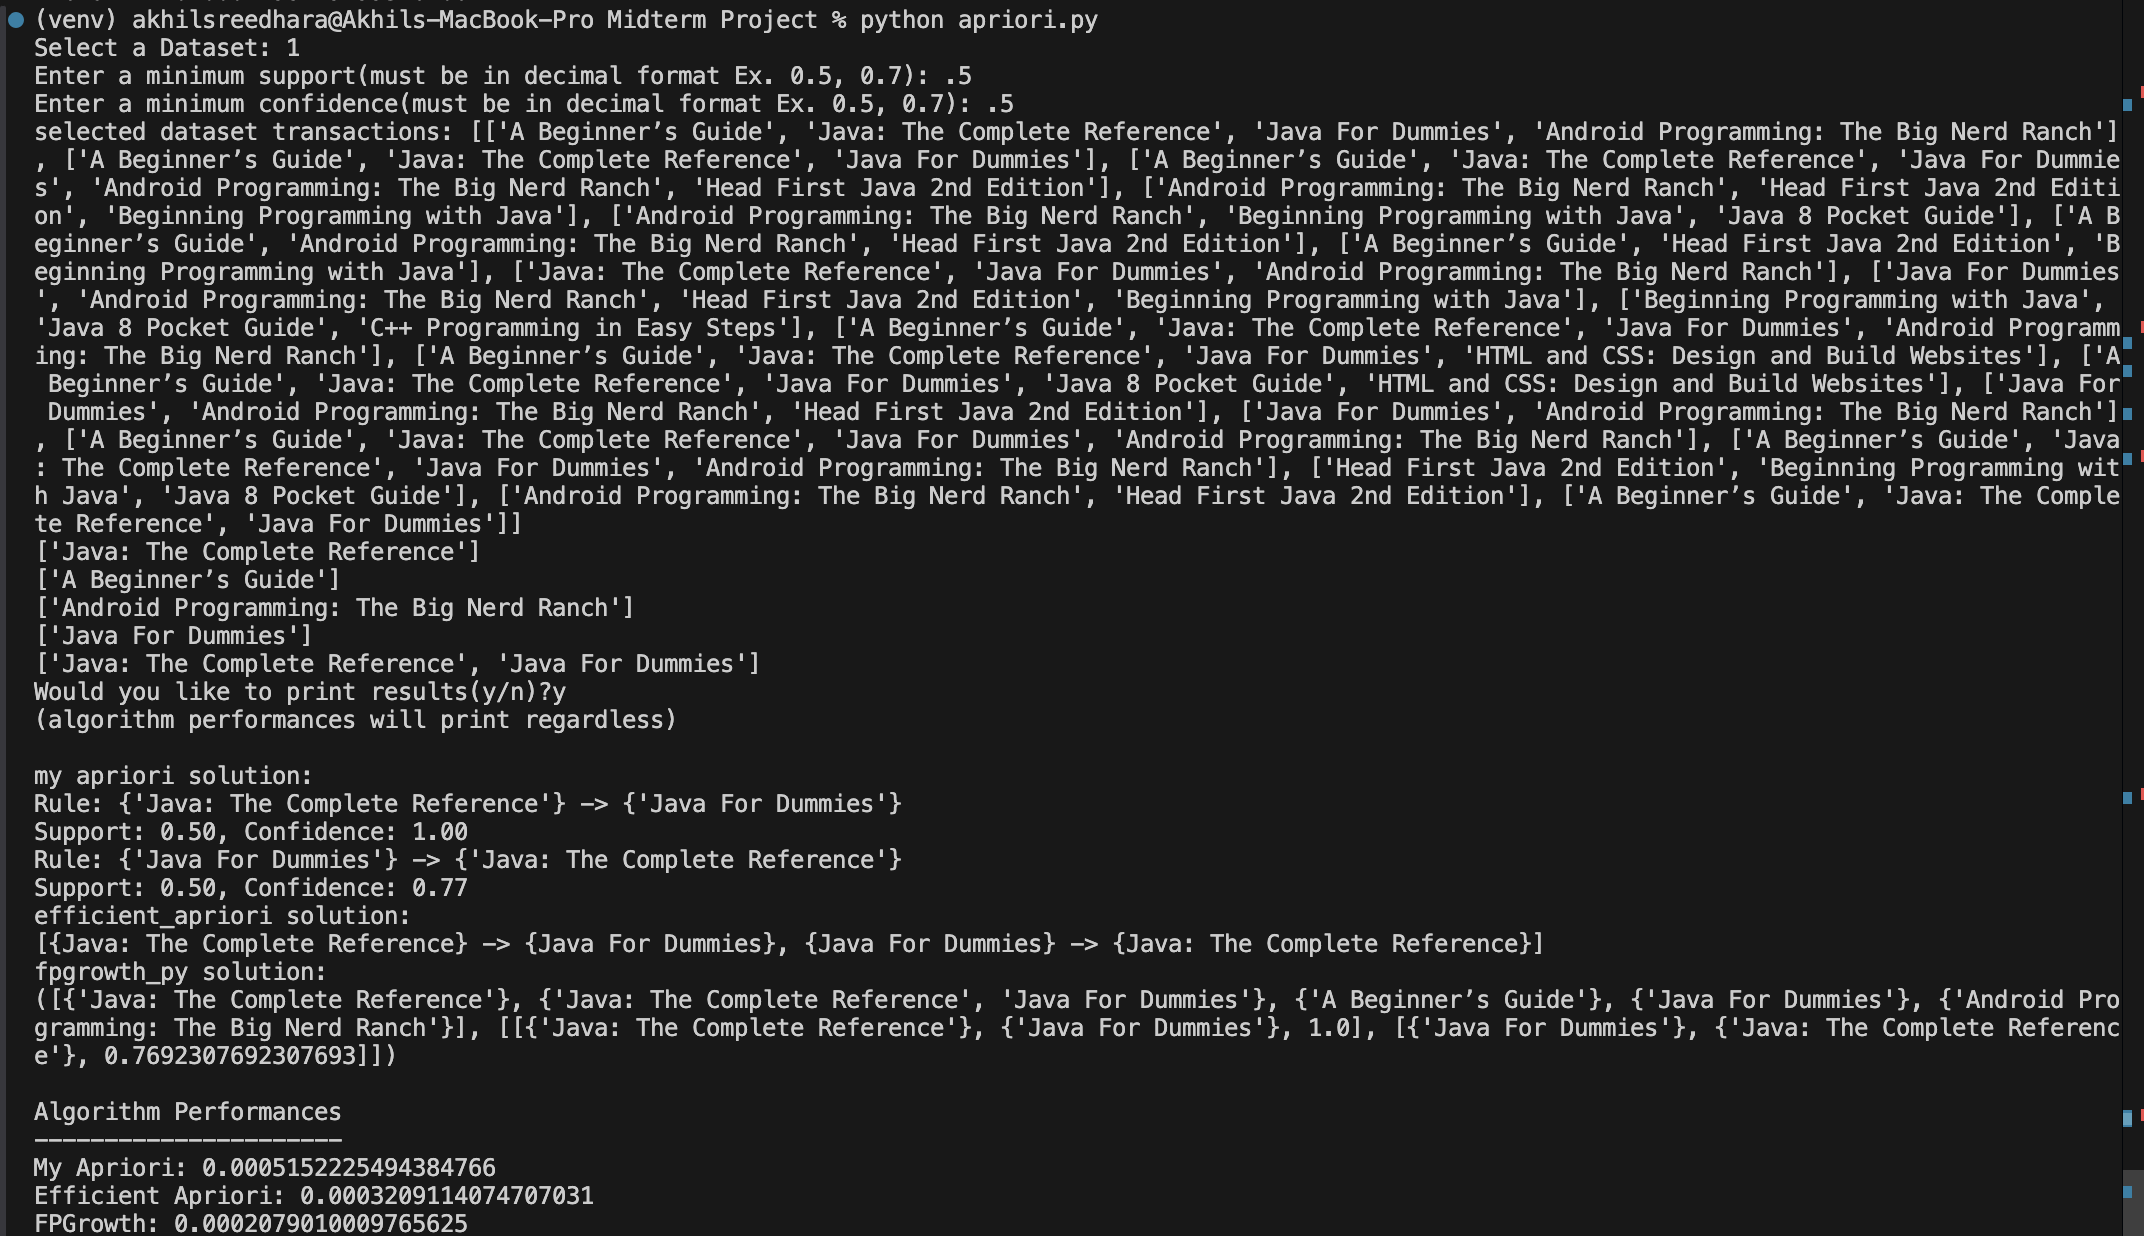

Dataset 1: Amazon<br>
Support: .3<br>
Confidence: .6<br>
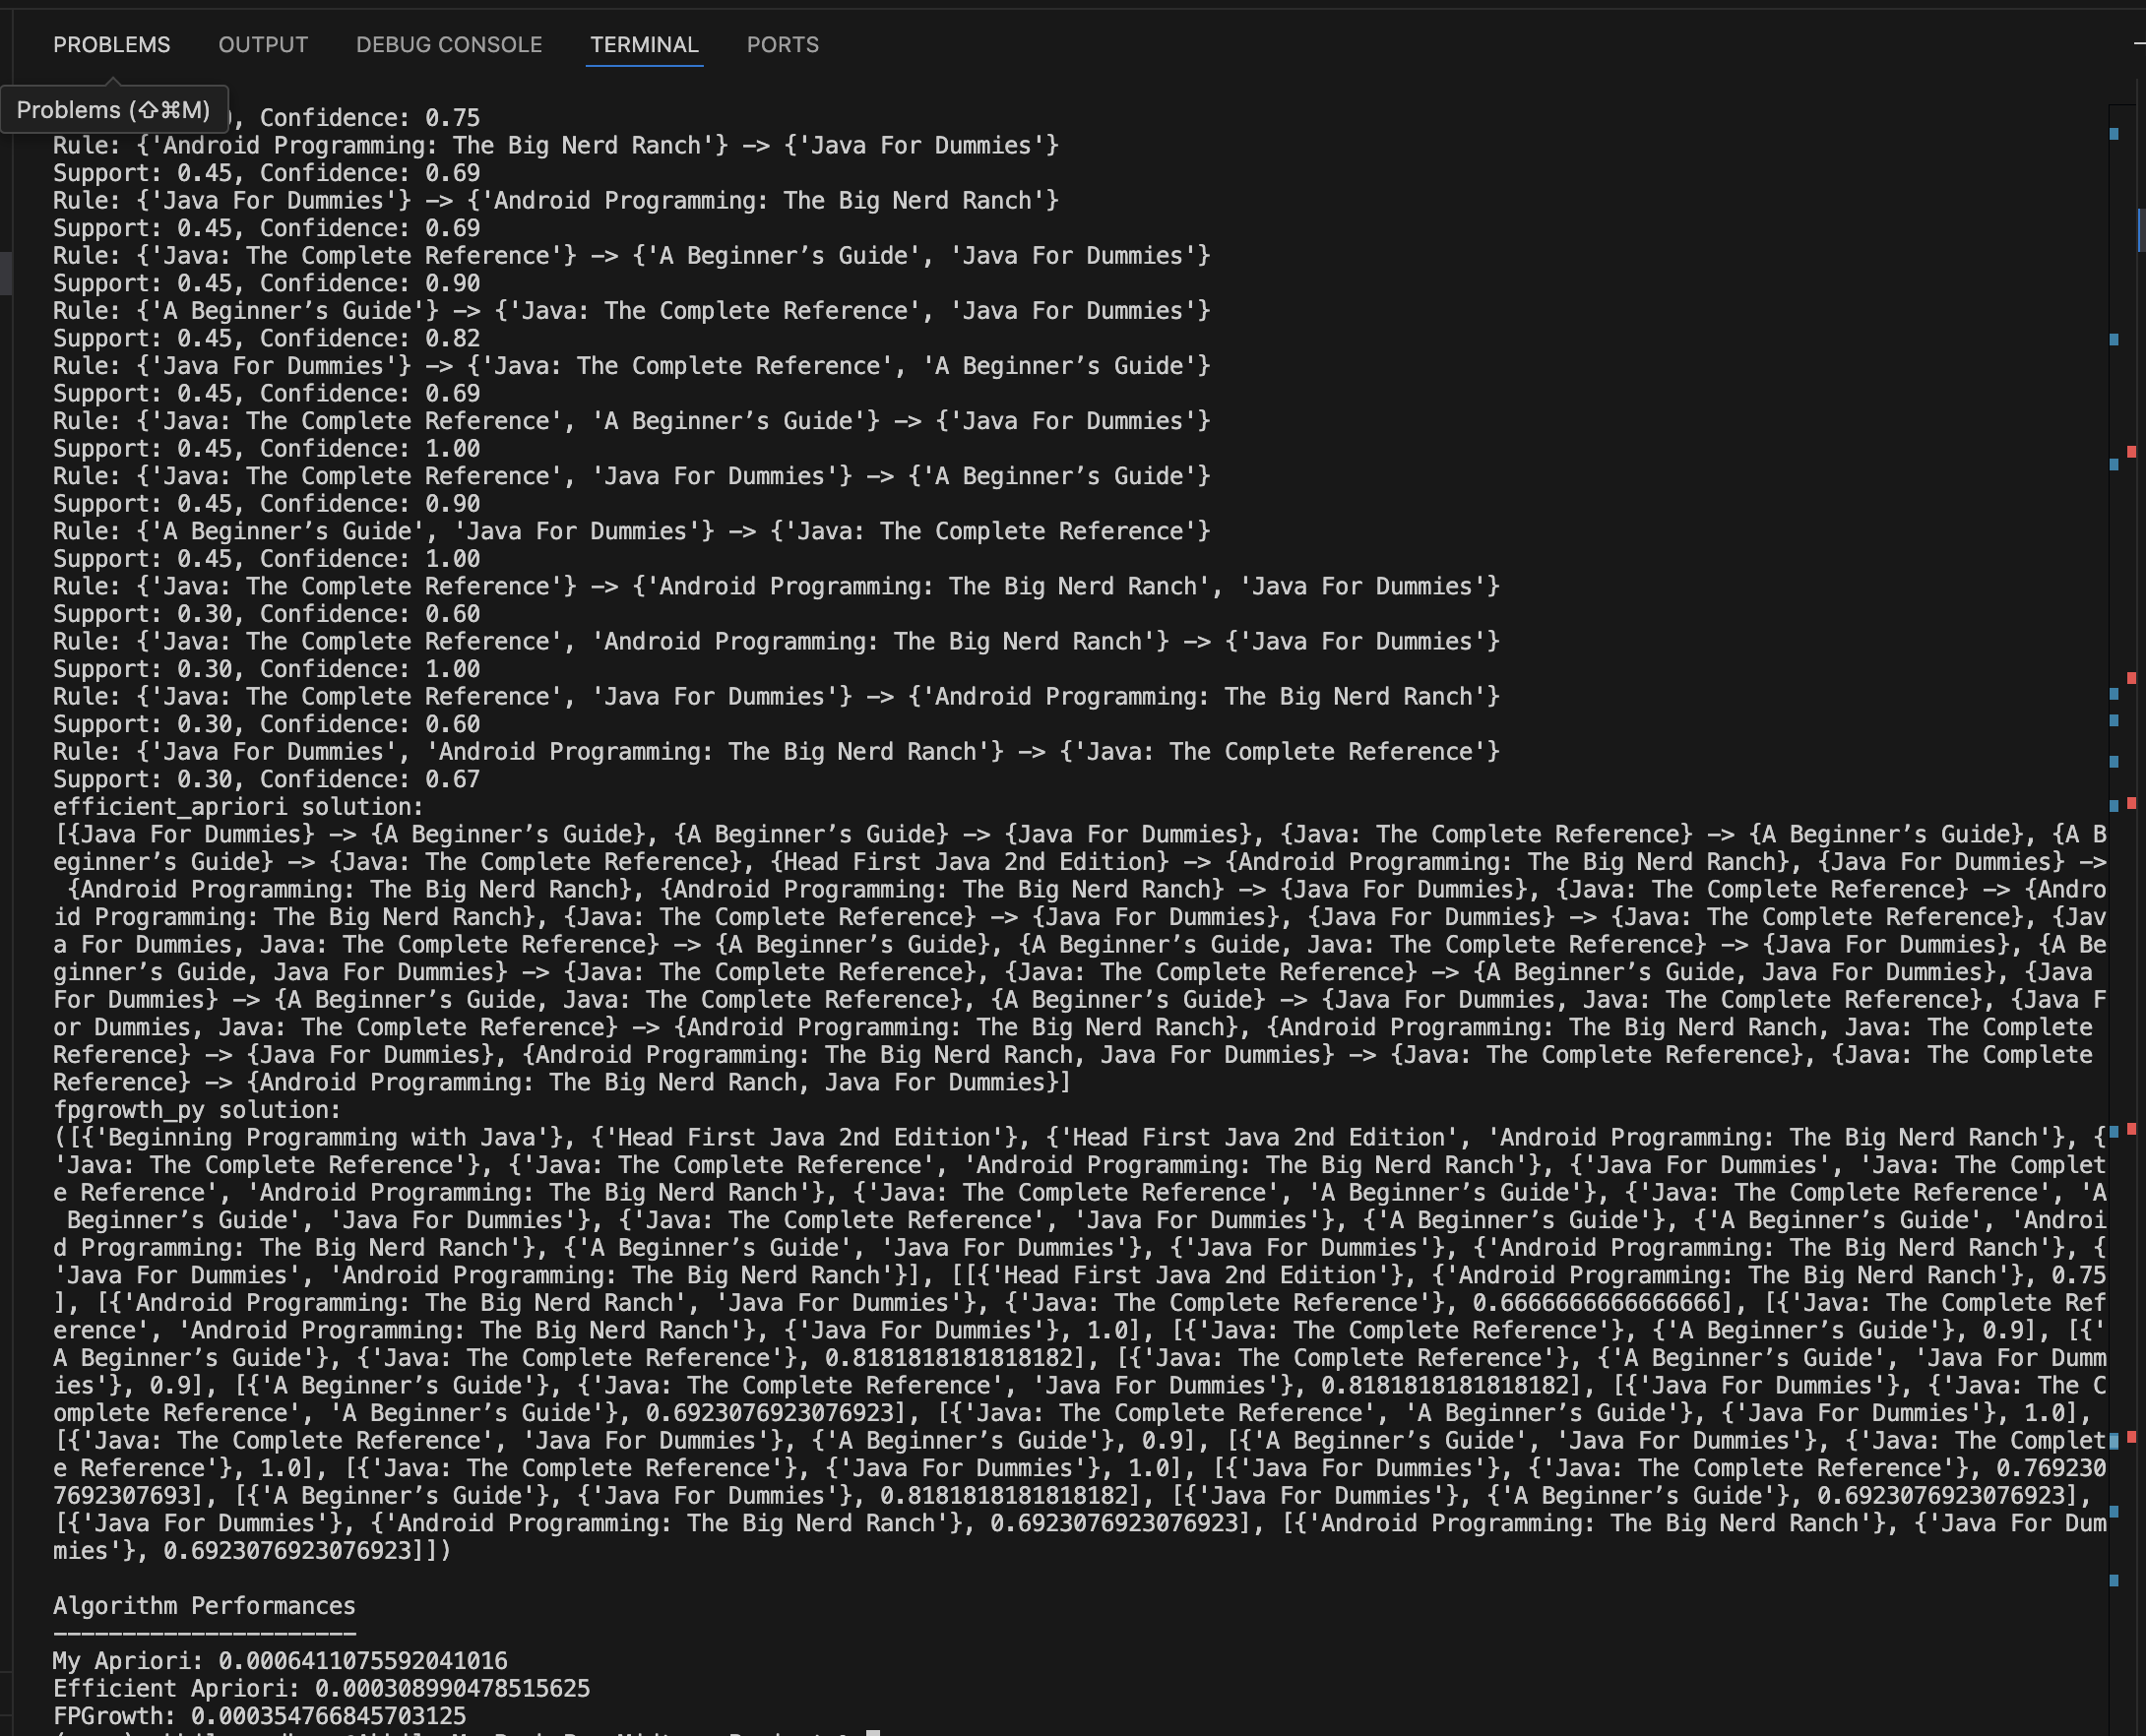

Dataset 2: Best Buy<br>
Support: .7<br>
Confidence: .6<br>
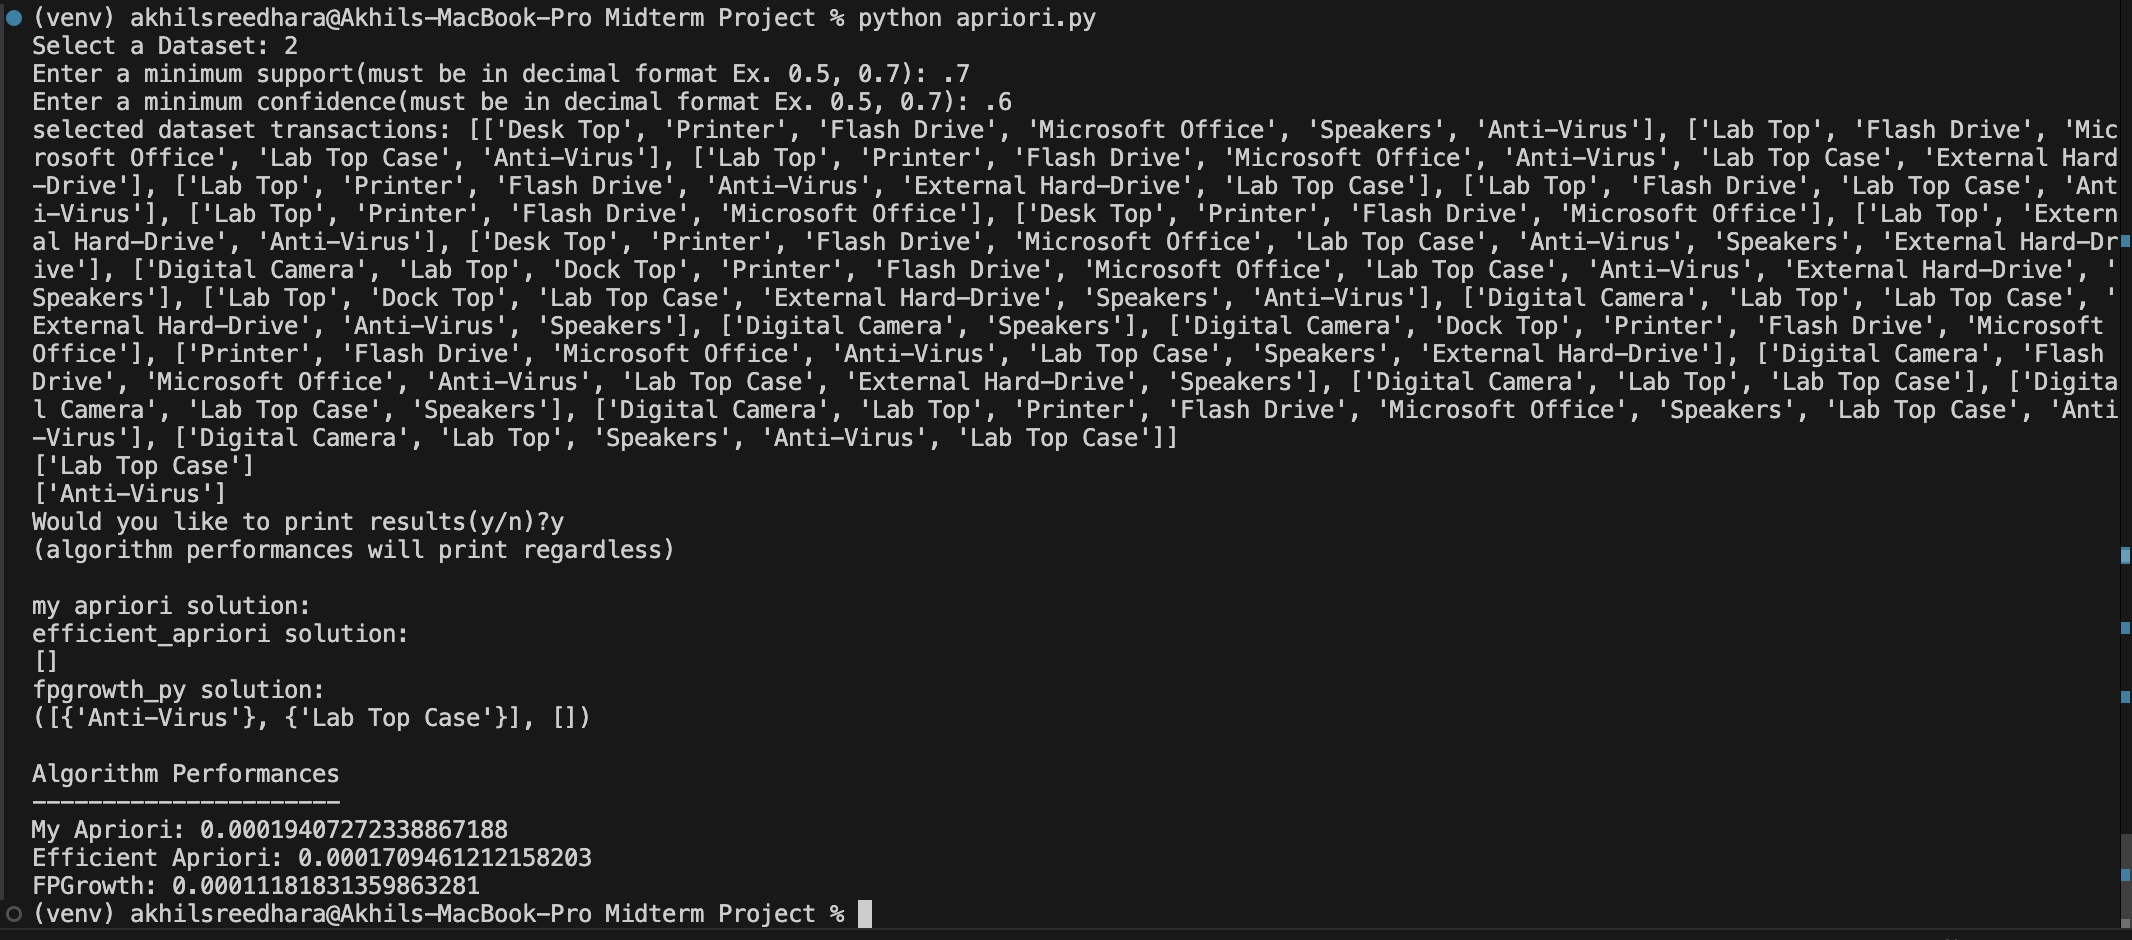

Dataset 3: Kmart<br>
Support: .4<br>
Confidence: .1<br>
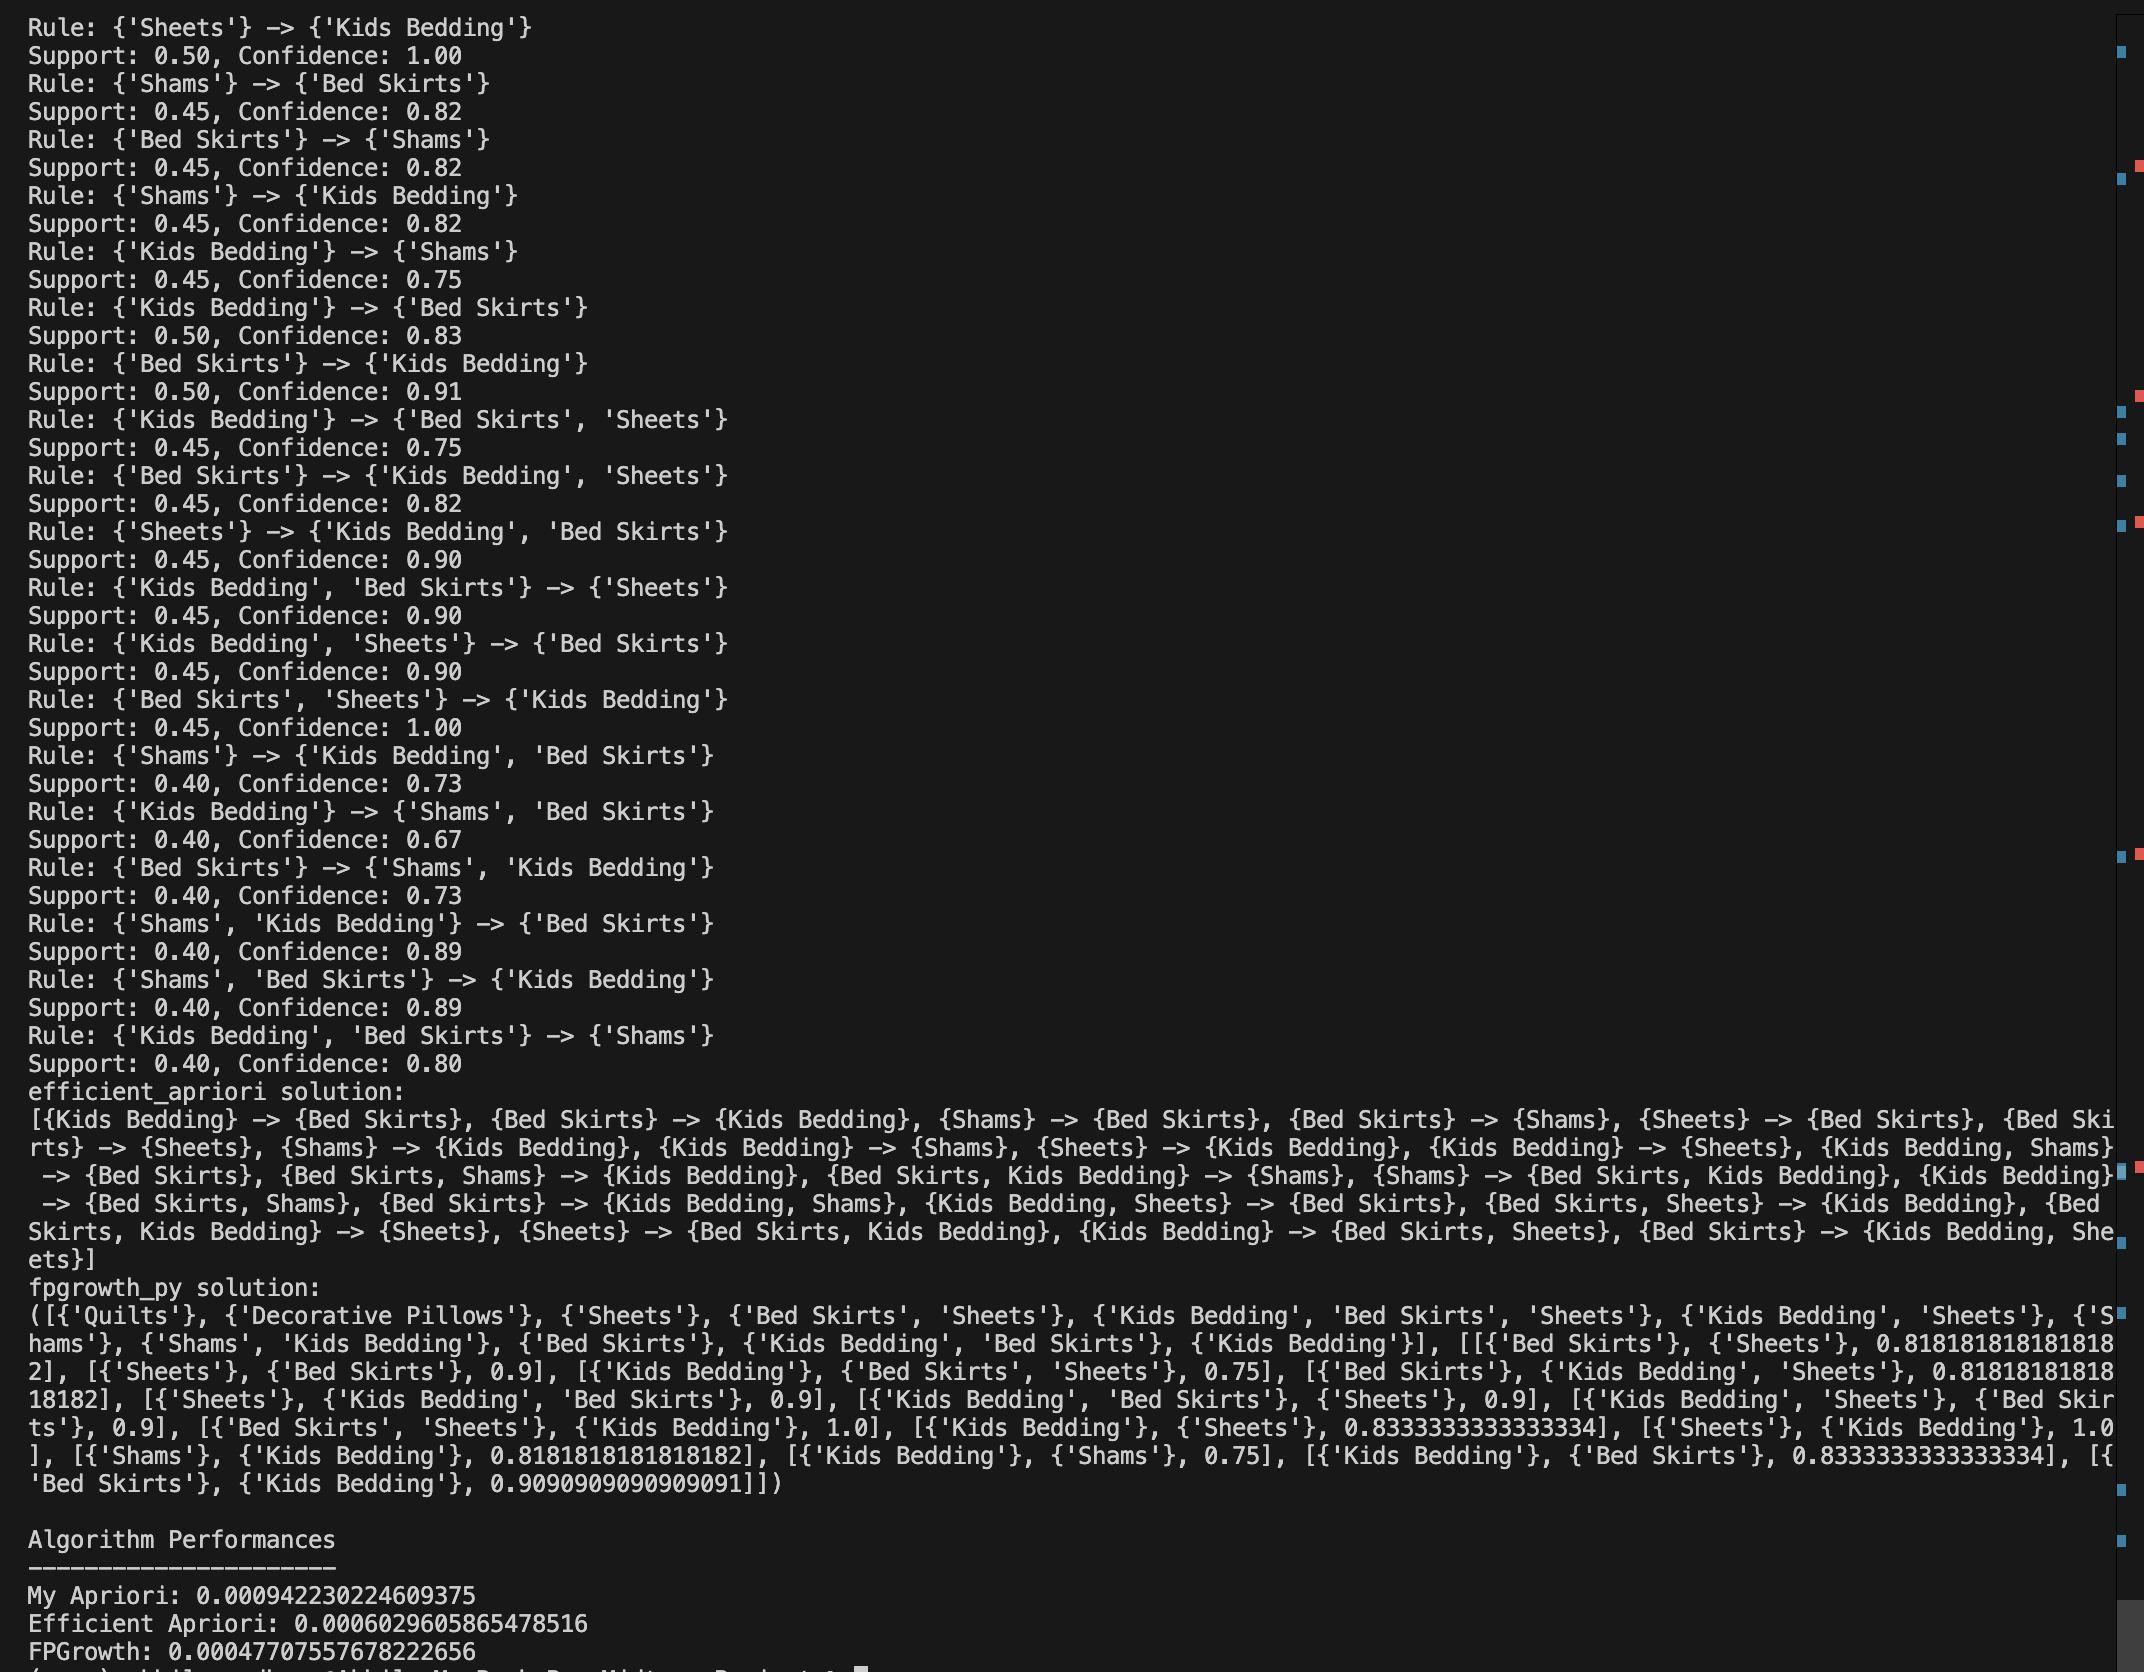

Dataset 4: Nike<br>
Support: .6<br>
Confidence: .7<br>
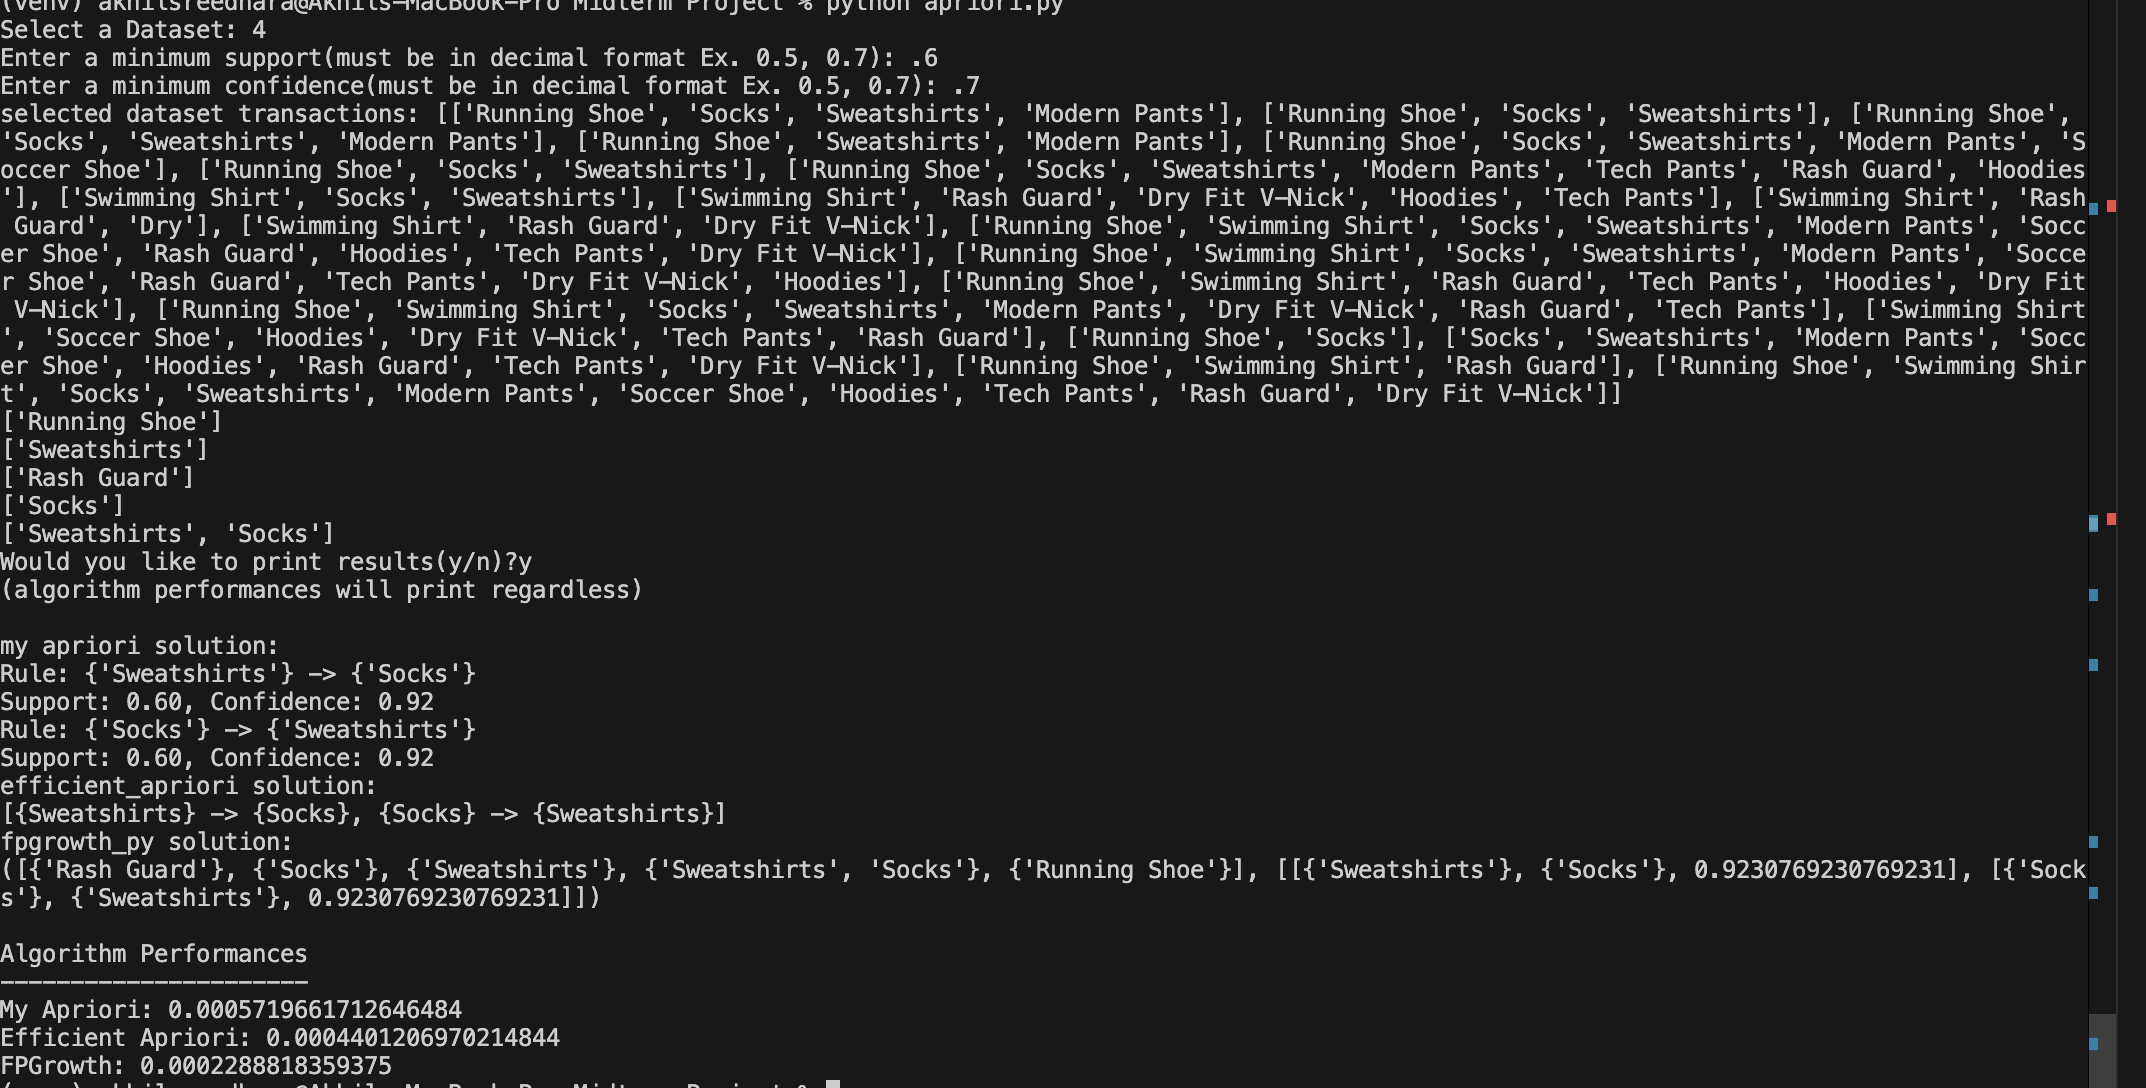

Dataset 5: Generic<br>
Support: .7<br>
Confidence: .7<br>
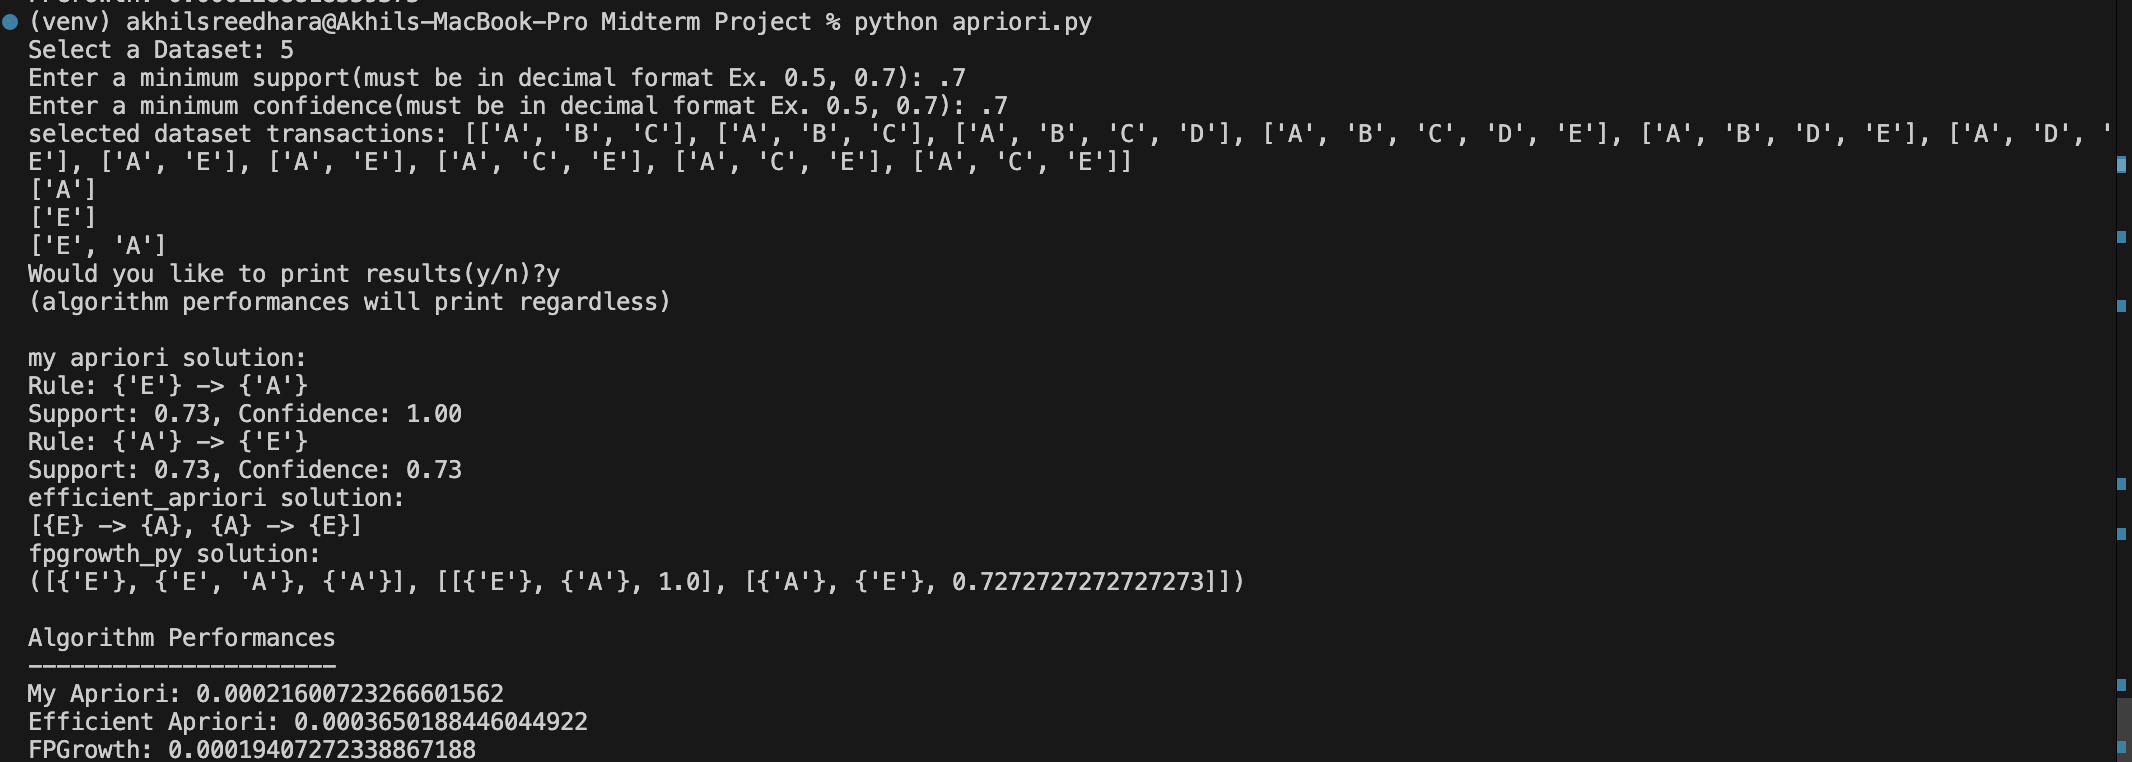